# <div align="center">Discover, Measure, and Mitigate Bias in a Dataset

The idea of fairness within AI comes from the idea that not all data is created equal, whether it’s measuring human populations or words in a document. If an AI algorithm is measuring the potential risk within a contract or agreement, such as a loan approval,  the context matters. Fairness in a legal setting is measuring whether a public policy is being applied equally across different races, genders, ethnicities and so forth. Fairness in AI means planning for these differences in data to make the end result representative of the goal that developers are actually trying to have the AI process tackle. In assessing human and civil rights and individual and societal harms from AI systems, research indicates that many forms of bias occur at the data collection stage. As a result, practices and methods to introduce fairness metrics into AI development can identify unprivileged attributes and measure bias. Then, techniques can be introduced to mitigate bias and find fairness in the dataset.  Using applied ethical practices of fairness in AI processes can mitigate harms from bias and produce a more complete end product from the AI processes. 

## Assignment Instructions 
The three sections of this tutorial will guide you through steps to illustrate how bias in loan data can be discovered, measured, and mitigated using code techiques and metrics. The  data comes from a hypothetical loan processing dataset. The techniques in this tutorial can be used to discover biased subgroups, determine the amount of bias, and mitigate this bias.
<strong> Complete the tutorial steps in each section, and respond to the indicated questions </strong>

<a href='#explore_dataset'>Part 1 DISCOVER IMBALANCE</a>
 1. Import necessary libraries. 
 2. Load the loan approval dataset. 
 3. Explore the dataset characteristics to identify biased subgroups.<br>

<strong>Respond to prompt: Q1</strong>

<a href='#measure_bias'>Part 2 MEASURE BIAS</a><p></p>

1. Statistical Parity
2. Odds Ratio
3. Equal Opportunity Difference
4. Disparate Impact

<strong>Respond to prompts: Q2, Q3, Q4</strong>

<a href='#logistic_regression'>Part 3 MITIGATE BIAS</a><p></p>

1. Run a Baseline Logistic Regression on the Unbalanced / Biased Data
2. Run a Logistic Regression with Re-Weighting 
3. Generate Synthetic Samples with SMOTE
4. Run a Logistic Regression with SMOTE
5. Logistic Regression with SMOTE + Re-Weighting
6. Aggregate Classification Reports for Comparison

<strong>Respond to prompts: Q5, Q6, Q7, Q8, Q9 and Q10</strong>

***

# Part 1 DISCOVER IMBALANCE <a id='explore_data'></a>

#### Import libraries

In [10]:
%pip install -q --upgrade pip
%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Load the dataset

In [12]:
#read data
data = pd.read_csvdata = pd.read_csv("loan_approval_biased.csv")

# Clone the dataset 
data_clone = data.copy()


In [13]:
data_clone.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360,360,0,Rural,Y
1,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490,180,1,Urban,Y
2,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600,180,0,Semiurban,Y
3,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120,360,1,Semiurban,Y
4,LP002422,Male,No,1,Graduate,No,37719,0.0,152,360,1,Semiurban,Y


In [14]:
data_clone.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002949,Female,No,3+,Graduate,No,416,41667.0,350,180,1,Urban,N
610,LP002717,Male,Yes,0,Graduate,No,1025,5500.0,216,360,0,Rural,N
611,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110,360,1,Urban,N
612,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135,360,1,Rural,N
613,LP002502,Female,Yes,2,Not Graduate,No,210,2917.0,98,360,1,Semiurban,N


Review the column headers and attributes.

In [15]:
print(data_clone.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  156.050489        334.866450   
std        6109.041673        2926.248369   99.128597         79.599764   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  175.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.812704  
std          0.390467  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<br>

In [16]:
# Count the number of males and females in the dataset
gender_counts = data_clone['Gender'].value_counts()

# Print the counts
print("Counts of each gender in the dataset")
print(gender_counts)

Counts of each gender in the dataset
Gender
Male      497
Female    117
Name: count, dtype: int64


In [17]:
# Create a label encoder object
le = LabelEncoder()

# List of columns to be label encoded
label_encoded_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply label encoding to each column of the cloned DataFrame
for col in label_encoded_columns:
    data_clone[col] = le.fit_transform(data_clone[col])


In [18]:
data_clone['Dependents'] = data_clone['Dependents'].replace('3+', 3)

In [19]:
data_clone.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002317,1,1,3,0,0,81000,0.0,360,360,0,0,1
1,LP002101,1,1,0,0,0,63337,0.0,490,180,1,2,1
2,LP001536,1,1,3,0,0,39999,0.0,600,180,0,1,1
3,LP001640,1,1,0,0,1,39147,4750.0,120,360,1,1,1
4,LP002422,1,0,1,0,0,37719,0.0,152,360,1,1,1


#### Determine the loan approval rates by gender. (0 = Female, 1 = Male)

In [20]:
# Filter for approved loans
approved_loans = data_clone[data_clone['Loan_Status'] == 1]

# Count the number of approved loans for each gender
gender_approval_counts = approved_loans['Gender'].value_counts()

print(gender_approval_counts)

Gender
1    217
0      2
Name: count, dtype: int64


#### Create Correlation Heatmap to examine data for bias

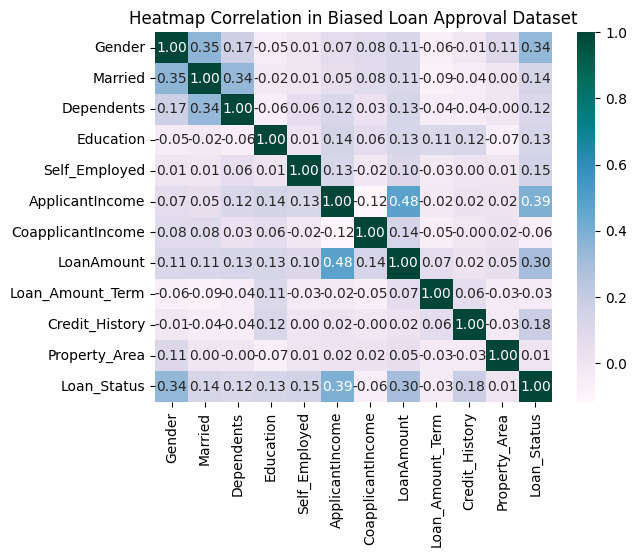

In [21]:
eda_data = data.copy()

# Convert 'Gender' to numeric for visualization purposes only
# **Be mindful when converting "F" and "M" to 0 and 1. Converting gender to a binary can oversimplify a
# multidimensional aspect of human identity, could potentially reinforce stereotypes, and create a 
# hierarcy.**

eda_data['Gender'] = eda_data['Gender'].map({'Female': 0, 'Male': 1})

# convert for heatmap
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {"No" : 0,"Yes" : 1}
dependents_stat = {"0":0,"1":1,"2":2,"3+":3}
education_stat = {"Not Graduate" : 0, "Graduate" : 1}
property_stat = {"Semiurban" : 0, "Urban" : 1,"Rural" : 2}
status_stat = {"N" : 0, "Y" : 1}

eda_data["Gender"] = eda_data["Gender"].replace(gender_stat)
eda_data["Married"] = eda_data["Married"].replace(yes_no_stat)
eda_data["Dependents"] = eda_data["Dependents"].replace(dependents_stat)
eda_data["Education"] = eda_data["Education"].replace(education_stat)
eda_data["Self_Employed"] = eda_data["Self_Employed"].replace(yes_no_stat)
eda_data["Property_Area"] = eda_data["Property_Area"].replace(property_stat)
eda_data["Loan_Status"] = eda_data["Loan_Status"].replace(status_stat)

sns.heatmap(eda_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="PuBuGn")
plt.title("Heatmap Correlation in Biased Loan Approval Dataset")
plt.show()

***

### Q1 Based on the Correlation Heatmap, which observations can you make?
<p><font color='blue'>Graded cell &#9658;</font></p>

Response:
I can tell that a majority of the males (biased dataset) that are married have a better chance at having an approved loan. I can also tell that the application income and loan amount are highly correlated. Another correlation with the applicant income is with the loan status amount. One could assume that the higher the application income, the greater the loan amount available is and the higher probability of a healhier loan status is. 


***

# PART 2: MEASURE THE BIAS <a id='measure_bias'></a>

In Part 2 you will examine four methods to measure bias in a dataset. 

1. Statistial Parity  
2. Odds Ratio
3. Equal Opportunity Difference
4. Disparate Impact 


### Statistical Parity

Statistical parity is the concept where a particular outcome or benefit is equally distributed across all groups in a population.  Simply put, it is a measurement of the difference in probabilities of a positive outcome across two groups. In an ideal and fair world, a statistical parity of 0 would be seen as ideal as it would indicate that there is no disparity in outcomes.

In [22]:
# Filter the dataset for approved loans
approved_loans = data_clone[data_clone['Loan_Status'] == 1]

# Calculate the counts of approved loans for each gender
approved_counts = approved_loans['Gender'].value_counts()


In [23]:
#calculate the total counts for each gender
gender_counts = data_clone['Gender'].value_counts()
print(gender_counts)

# Now, calculate the approval rates
approval_rate_male = approved_counts[1] / gender_counts[1]  # 1 is Male
approval_rate_female = approved_counts[0] / gender_counts[0]  # 0 is Female

# Print the approval rates
print(f"Loan Approval Rate for Males: {approval_rate_male:.2f}")
print(f"Loan Approval Rate for Females: {approval_rate_female:.2f}")

# Compare the rates to check for statistical parity
parity_difference = abs(approval_rate_male - approval_rate_female)
print(f"Difference in Approval Rates: {parity_difference:.2f}")


Gender
1    497
0    117
Name: count, dtype: int64
Loan Approval Rate for Males: 0.44
Loan Approval Rate for Females: 0.02
Difference in Approval Rates: 0.42


### Odds Ratio

The odds ratio is a measure of association between an exposure and an outcome. In the context of loan approvals for this dataset, it would be the ratio of the odds of a loan being approved for females to the odds of a loan being approved for males.

The odds of approval are calculated as the ratio of loans approved to those not approved. For instance, if 20 loans are approved and 80 are not, the odds of approval would be 20/80 or 0.25.

To calculate the odds ratio (OR):

OR = Odds Female / Odds Male
 
If OR > 1, it implies higher odds of approval for females; OR < 1 implies lower odds of approval for females compared to males.

In [24]:
# calculate odds for each gender
odds_female = data_clone[data_clone['Gender'] == 0]['Loan_Status'].mean() / (1 - data_clone[data_clone['Gender'] == 0]['Loan_Status'].mean())
odds_male = data_clone[data_clone['Gender'] == 1]['Loan_Status'].mean() / (1 - data_clone[data_clone['Gender'] == 1]['Loan_Status'].mean())

# Calculate Odds Ratio
odds_ratio = odds_female / odds_male

# Print results
print(f"Odds Ratio: {odds_ratio}")



Odds Ratio: 0.022440392706872377


### Eqaual Opportunity Difference (EOD)

Equal opportunity difference is a fairness metric that measures the difference in the true positive rates (sensitivity) between two groups. In this dataset, it is the difference in the rate at which loans are correctly approved for females and males.

To calculate equal opportunity difference (EOD):

EOD = TPRfemale - TPRmale 

Here, TPR (True Positive Rate) is the proportion of actual positives that are correctly identified as such (e.g., the proportion of qualified loan applicants who are correctly approved).

If EOD is zero, there is no disparity in approval rates between genders; if EOD is positive, females have a higher rate of correct approval; if EOD is negative, males have a higher rate of correct approval.

In [25]:

# Calculate True Positive Rates for each gender
tpr_female = data_clone[(data_clone['Gender'] == 0) & (data_clone['Loan_Status'] == 1)].shape[0] / data_clone[data_clone['Gender'] == 0].shape[0]
tpr_male = data_clone[(data_clone['Gender'] == 1) & (data_clone['Loan_Status'] == 1)].shape[0] / data_clone[data_clone['Gender'] == 1].shape[0]

# Calculate Equal Opportunity Difference
equal_opportunity_difference = tpr_female - tpr_male

# Print results
print(f"Equal Opportunity Difference: {equal_opportunity_difference}")

Equal Opportunity Difference: -0.41952570121584204


## Disparate Impact


Disparate impact refers to a concept used primarily in employment and anti-discrimination law, though it also applies to other areas such as housing and lending. It occurs when a seemingly neutral policy, criterion, or practice has a disproportionately negative effect on a specific group of people, particularly when that group is defined by characteristics such as race, gender, age, or disability, even when there is no intential discrimination.


#### Loan_Approval Disparate Impact (DI) in Females
The industry standard for determining disparate impact in loan approvals often revolves around  a rule know as the 80% rule, or four-fifths rule. (This guideline is used in the United States by the Equal Employment Opportunity Commission and is often referenced in other areas such as lending practices under fair lending laws.)

*Important to note that is a guideline, not a law in lending.

#### Initial Approval Rates by Gender 

In [26]:
# Calculate initial approval rates by gender
approval_rates = data_clone.groupby('Gender')['Loan_Status'].mean()

# Print initial approval rates
print("Initial Approval Rates by Gender:Female = 0, Male = 1")
print(approval_rates)

Initial Approval Rates by Gender:Female = 0, Male = 1
Gender
0    0.017094
1    0.436620
Name: Loan_Status, dtype: float64


In [27]:
# Calculate initial disparate impact

#approval rates of females / approval rates of males
initial_di = approval_rates[0] / approval_rates[1]

print("Initial Disparate Impact")
print(initial_di)

Initial Disparate Impact
0.03915081334436174


### Q2 After examining the results of the statistical parity, the odds ratio, the equal opportunity distance, and the disparate impact, what can you conclude from the data?
<p>Graded cell &#9658;</p>

<font color="blue">Response: </font>

That the dataset is baised and heavy in favor for Males in loans. 



### Q3. Which types of potential bias can you identify in this loan approval dataset? Provide specific examples and explain how the bias you identified is reflected in the data.
<p>Graded cell &#9658;</p>

<font color="blue">Response: </font>

Three types of bias I see are gender, income, and marital bias. Gender bias can be seen by the facts of the Initial Approval Rates by Gender (Female: 0.017094 / Male: 0.436620) and Equal Opportunity Difference: -0.41952570121584204. The marital bias could be seen from the value 0.35 in the heatmap. Finally the income biased could be determine from the 0.48 correlation value application income and loan status. Even though they make more money shouldn't always determine if they should qualify for the loan. 





### Q4. If unaddressed, how can the biases you identified affect: a.) individuals, b.) enterprises, and c.) society?
<p>Graded cells &#9658;</p>


<font color="blue">Response:[Individuals]</font>

Femals may have harder time trying to get loans approved. In could impact what kind of home they get because it may require them to save more money and not get the home they wanted. Unqualifed males could instead get the loans earlier during a moving housing market. 

<font color="blue">Response:[Organizations] </font>

Organiations that offer or approve of these loans could become liable to a lawsuit if qualified females notice they are be ing discrimated against. 

<font color="blue">Response:[Society] </font>

As a society, females could subconsiously feel more pressure to marry in order to qualify for a loan and get started with as a family sooner.  

***

# Part 3 MITIGATE THE BIAS <a id='logistic_regression'></a>

In this portion of the assignment, you will assess the impact of re-weighting, generating synthetic samples (with SMOTE), and a combining re-weighting and synthetic samples on a logistic regression. You will then assess performance and the trade-offs through comparison of their evaluation metrics.
***
1. Run a Baseline Logistic Regression on the Unbalanced / Biased Data
2. Run a Logistic Regression with Re-Weighting
3. Generate Synthetic Samples with SMOTE
4. Run a Logistic Regression with SMOTE
5. Logistic Regression with SMOTE + Re-Weighting
6. Aggregate Classification Reports for Comparison

### Run a Baseline Logistic Regression on the Unbalanced / Biased Data

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [29]:
# Define your features (X) and target variable (y)
X = data_clone.drop(['Loan_ID', 'Loan_Status'], axis=1)  
y = data_clone['Loan_Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

# Train a logistic regression model on the original data
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
cr_unbalanced_biased = classification_report(y_test, y_pred)
print(cr_unbalanced_biased)


              precision    recall  f1-score   support

           0       0.87      0.95      0.90        75
           1       0.90      0.77      0.83        48

    accuracy                           0.88       123
   macro avg       0.88      0.86      0.87       123
weighted avg       0.88      0.88      0.88       123



### Run a Logistic Regression with Re-Weighting

<p><font color='blue'>Graded cell &#9658;</font></p>

In [30]:

#Approval Rate for Females before re-weighting = 1.7094%
#Approval Rate for Males before re-weighting = 43.6620%

#DI equation: Pr(Y=1 | D=unprivileged) / Pr(Y=1 | D=privileged)

#plugging the numbers in ---> new weight for females = (0.8 * 43.6620%) / 1.7094  ≈ 20.5


# Define the class weights for re-weighting
# It could potentially be worthwhile to try different weights

def reweight_model(weights={0: 20.5, 1: 1}):
    class_weights = weights  # (Re-weight females)

    # Create the logistic regression model with class weights

    logreg = LogisticRegression(max_iter=10000, class_weight=class_weights)

    logreg.fit(X_train, y_train)

    # Evaluate the model
    y_pred = logreg.predict(X_test)
    cr = classification_report(y_test, y_pred)

    return cr



In [31]:
cr_logreg_unbiased_reweighted =reweight_model()
print(cr_logreg_unbiased_reweighted)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        75
           1       1.00      0.38      0.55        48

    accuracy                           0.76       123
   macro avg       0.86      0.69      0.69       123
weighted avg       0.83      0.76      0.72       123



# Generate Synthetic Samples with SMOTE

### Using SMOTE to generate synthetic samples from the minority class (females) to help balance the data.
    

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method to balance datasets. It works by creating synthetic samples from the minority class (in this case, 'Female' if we consider 'Gender' for minority oversampling, or 'N' for 'Loan_Status' if we are considering the outcome) instead of creating copies. This is done by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

1.) Before applying SMOTE, the dataset should be split into training and testing sets.

2.) SMOTE should only be applied to the training set.(SMOTE generates synthetic samples based on the existing minority 
    class in the data applying it to your test set would introduce synthetic data into the set that you'll use for 
    validation, which can lead to overly inflated performance estimates.)

In [32]:
!pip install imblearn

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

# Apply SMOTE to the training data only!
smote = SMOTE(random_state=531)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Run a Logistic Regression with SMOTE 

<p><font color='blue'>Graded cell &#9658;</font></p>

In [35]:
# Train a logistic regression model on the SMOTE data

# Train a logistic regression model on the original data
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred = logreg.predict(X_test)

cr_logreg_smote = classification_report(y_test, y_pred)
print(cr_logreg_smote)


              precision    recall  f1-score   support

           0       0.90      0.85      0.88        75
           1       0.79      0.85      0.82        48

    accuracy                           0.85       123
   macro avg       0.84      0.85      0.85       123
weighted avg       0.86      0.85      0.85       123



# Logistic Regression with SMOTE + Re-Weighting

<p><font color='blue'>Graded cell &#9658;</font></p>

In [36]:
# Use sample weights from logistic regression with re-weighting and/or choose new weights

cr_log_reg_smote_reweight = reweight_model(weights={0: 20.5, 1: 1})

# Aggregate Classification Reports for Comparison

<p><font color='blue'>Graded cell &#9658;</font></p>

In [37]:
# Generate classification reports

# Combine the reports

# Print the combined report

print(cr_unbalanced_biased)
print(cr_logreg_unbiased_reweighted)
print(cr_logreg_smote)
print(cr_log_reg_smote_reweight)

              precision    recall  f1-score   support

           0       0.87      0.95      0.90        75
           1       0.90      0.77      0.83        48

    accuracy                           0.88       123
   macro avg       0.88      0.86      0.87       123
weighted avg       0.88      0.88      0.88       123

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        75
           1       1.00      0.38      0.55        48

    accuracy                           0.76       123
   macro avg       0.86      0.69      0.69       123
weighted avg       0.83      0.76      0.72       123

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        75
           1       0.79      0.85      0.82        48

    accuracy                           0.85       123
   macro avg       0.84      0.85      0.85       123
weighted avg       0.86      0.85      0.85       123

              preci

### Q5. Briefly discuss the techniques used to address dataset imbalance and bias. What are the advantages and limitations of each method?

<font color="blue">Response: </font>

Techniques used were to used reweighting valu for the model and SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method to balance datasets, and a combination of the two. Pros are that you can get a better representation and a more accuracte answer for the general person. Cons could be that too much synethitic data could cause model drift sooner. 

### Q6. What are the impacts of bias and imbalance on model performance? How do imbalanced and biased datasets affect the performance of machine learning models?

<font color="blue">Response: </font>

The impact of biased and imblanced datasets trains the model incorrectly and has a lower model performance and model accuracy due to the minority being mis/under-represented. False correlations are more likely to occur when training with biaed / imbalanced data.

### Q7. How might a model might perform well in terms of accuracy but still be biased?

<font color="blue">Response: </font>

Some biases hold some truth and cannot be dissmissed. A model could be accuracte and biased because the correlation of some features are truly dependent. For example, in order to qualify for a larger loan, it would make sense that you need a higher income or the fact that one is married makes them more likely to qualify for a loan because of larger household income. 

### Q8. After examination and comparison of the classification reports, what are the key findings? If you were tasked with choosing one model to use in a real-world application, which one would you choose, and why?

<font color="blue">Response: </font>

I would use the origina model and dataset because it's the most accurate on the test dataset when considering both male and females. I would try different techniques like this and notice how the accuracy of my overall model and of the under represented or minority group. 

I noticed by doing different preprocessing techniques, I could lose accuracy of the other group significantly where the model prediction becomes biased for the under sampled group. 


### Q9. Which ethical considerations should be taken into account when attempting to correct for bias in a dataset?

<font color="blue">Response: </font>

Some ethical considerations when correcting for bias is if bias needs correcting in the first place. If the bias comes from a reflection of environment and not how the data is collected then it may not be appropriate to correct. 

### Q10 Discuss the trade-offs between model accuracy and fairness. How might the pursuit of fairness in a dataset conflict with other data science goals? When might it be more important to prioritize one over the other? How would you make a decision about the acceptable level of trade-off in a real-world scenario?

<font color="blue">Response [Trade-offs: Model Accuracy & Fairness]: </font>

Trade offs when it comes to accuracy and fairness is how much will the modle be tuned with weights in order to compensate for the bias in the dataset. Data scietist will have to determine how much of their data to use or how much preprocessing they could do without drifting from the original model accuracy or introducing new bias.

<font color="blue">Response [Goals Conflict & Prioritization]: </font>

In the pursuit of fairness the model could be trained with biased weights that try to counter fit the original bias in the data collected and used to train model. This could really conflict with the data science goals of analyzing the raw data as is and not fabricate results to achieve fairness. 

<font color="blue">Response [Decision on Acceptable Trade-Off]: </font>

The acceptable level of trade-off will vary for each individual real world scenario. Things to consider would always be how much the minority group are under represented, the original and modified (reweighted) accuracy of model, and how valid is the inherit bias in the dataset. To me as long as I don't put a group in a much greater disadvantage, as I'm trying to rebalance the model weights, giving both groups a fair chance by improving the minority greatly and minimizing the accuracy loss of the majority group. 

In [ ]:
# Colab2PDF v1.0.2 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()